In [3]:
import pandas as pd
df = pd.read_csv("../data/task3/inst.csv")
df.head()

,Name,Total,FLOPS,Reads,Writes
0,blackscholes,2.67,1.14,0.68,0.19
1,bodytrack,14.03,4.22,3.63,0.95
2,canneal,7.33,0.48,1.94,0.89
3,dedup,37.10,0.00,11.71,3.13
4,facesim,29.90,9.10,10.05,4.29


In [9]:
parsec_benchmarks = ["canneal", "dedup", "blackscholes", "vips", "ferret", "freqmine"]
df["flop_ratio"] = df["FLOPS"] / df["Total"]
df["mem_ratio"] = (df['Reads'] + df['Writes']) / df["Total"]
df = df[df["Name"].isin(parsec_benchmarks)]


Text(0.5, 1.0, 'Ratio of FLOPS to total instructions')

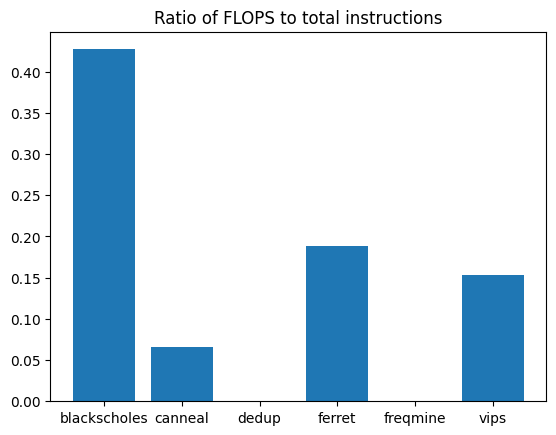

In [11]:
import matplotlib.pyplot as plt
plt.bar(x=df['Name'], height=df["flop_ratio"])
plt.title("Ratio of FLOPS to total instructions")

Text(0.5, 1.0, 'Ratio of READ/WRITE to total instructions')

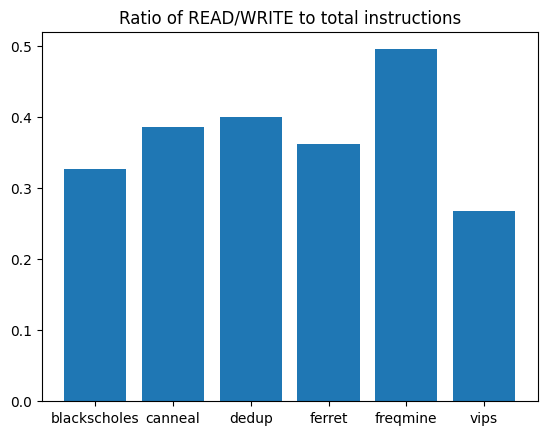

In [13]:
plt.bar(x=df['Name'], height=df["mem_ratio"])
plt.title("Ratio of READ/WRITE to total instructions")

In [22]:
import json
import pprint
with open ("../part_3_results_group_073/pods_1.json") as f:
    data = json.load(f)
print(len(data["items"]))
times = {}
for item in data["items"][:-1]:
    for c in item["status"]["containerStatuses"]:
        times[c['name']] = {"started_at": c["state"]["terminated"]["startedAt"],"ended_at": c["state"]["terminated"]["finishedAt"]}

8


In [23]:
times

{'parsec-blackscholes': {'started_at': '2025-05-14T12:54:44Z',
  'ended_at': '2025-05-14T12:56:46Z'},
 'parsec-canneal': {'started_at': '2025-05-14T12:54:45Z',
  'ended_at': '2025-05-14T12:57:23Z'},
 'parsec-dedup': {'started_at': '2025-05-14T12:54:45Z',
  'ended_at': '2025-05-14T12:55:31Z'},
 'parsec-ferret': {'started_at': '2025-05-14T12:54:44Z',
  'ended_at': '2025-05-14T12:57:30Z'},
 'parsec-freqmine': {'started_at': '2025-05-14T12:54:44Z',
  'ended_at': '2025-05-14T12:57:07Z'},
 'parsec-radix': {'started_at': '2025-05-14T12:57:11Z',
  'ended_at': '2025-05-14T12:57:25Z'},
 'parsec-vips': {'started_at': '2025-05-14T12:54:44Z',
  'ended_at': '2025-05-14T12:57:07Z'}}

In [24]:
from utils.convert_to_csv import convert_to_csv
convert_to_csv("../part_3_results_group_073/mcperf_1.txt", "../part_3_results_group_073/mcperf_1.csv")

Successfully converted ../part_3_results_group_073/mcperf_1.txt to ../part_3_results_group_073/mcperf_1.csv


In [27]:
df.head()

,type,avg,std,min,p5,p10,p50,p67,p75,p80,p85,p90,p95,p99,p999,p9999,QPS,target,ts_start,ts_end
0,read,189.7,84.3,74.4,114.9,125.7,179.9,204.1,218.0,228.4,240.2,255.4,281.8,367.3,1188.2,2568.8,29911.7,30000,1747227281708,1747227291839
1,read,196.0,137.4,74.4,116.8,126.5,178.8,203.5,218.3,229.5,242.5,259.3,288.0,492.1,1998.9,3232.5,29996.0,30005,1747227293350,1747227303467
2,read,190.9,119.9,74.4,116.6,125.7,175.5,199.6,214.3,225.2,237.4,253.9,280.9,400.7,1989.5,3965.2,29941.1,30010,1747227304976,1747227315074
3,read,186.8,94.2,74.4,113.6,122.8,175.5,200.0,215.0,225.9,238.1,253.9,280.3,364.8,1317.7,2933.6,30067.8,30015,1747227316585,1747227326682
4,read,186.2,83.3,74.4,113.7,122.6,174.7,200.4,216.1,227.6,240.6,257.1,284.1,355.0,1107.0,2799.5,30101.2,30020,1747227328192,1747227338290


In [35]:
import datetime as dt
processed = {}

def timestamp_to_milliseconds(timestamp_str):
    # Parse the ISO format timestamp
    d = dt.datetime.fromisoformat(timestamp_str.replace('Z', '+00:00'))
    
    # Convert to seconds since epoch as a float
    seconds_since_epoch = d.timestamp()
    
    # Convert to milliseconds (multiply by 1000) and truncate to integer
    milliseconds = int(seconds_since_epoch * 1000)
    
    return milliseconds
begin = timestamp_to_milliseconds(times["parsec-blackscholes"]["started_at"])
for name, time in times.items():
    _, name = name.split("-")
    ts = (timestamp_to_milliseconds(time["started_at"]) - begin, timestamp_to_milliseconds(time["ended_at"])- begin)
    processed[name] = ts
processed

    

{'blackscholes': (0, 122000),
 'canneal': (1000, 159000),
 'dedup': (1000, 47000),
 'ferret': (0, 166000),
 'freqmine': (0, 143000),
 'radix': (147000, 161000),
 'vips': (0, 143000)}

In [37]:
df_parsec = pd.DataFrame([(app, start, end) for app, (start, end) in processed.items()],
                  columns=['application', 'start', 'end'])

In [38]:
df_parsec

,application,start,end
0,blackscholes,0,122000
1,canneal,1000,159000
2,dedup,1000,47000
3,ferret,0,166000
4,freqmine,0,143000
5,radix,147000,161000
6,vips,0,143000


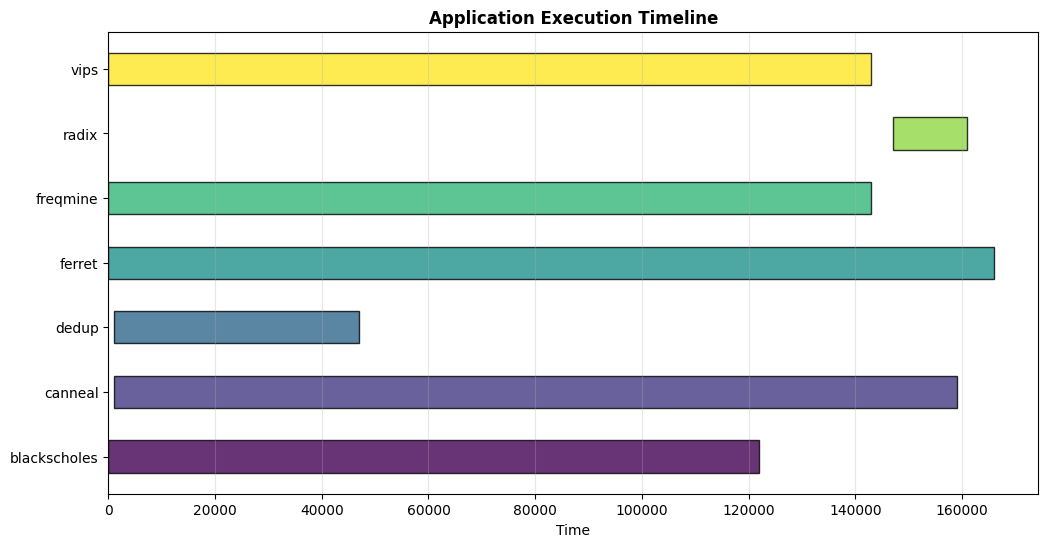

In [41]:
import numpy as np
import matplotlib.pyplot as plt
df_parsec['duration'] = df_parsec['end'] - df_parsec['start']

# Create the Gantt chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
y_positions = np.arange(len(df_parsec))
colors = plt.cm.viridis(np.linspace(0, 1, len(df_parsec)))

for i, (_, row) in enumerate(df_parsec.iterrows()):
    ax.barh(i, row['duration'], left=row['start'], height=0.5, 
            color=colors[i], alpha=0.8, edgecolor='black')
    
    # Add text labels for start and end times
#     ax.text(row['start'], i, f"{row['start']}", 
#             va='center', ha='right', fontsize=9)
#     ax.text(row['end'], i, f"{row['end']}", 
#             va='center', ha='left', fontsize=9)

# Customize the chart
ax.set_yticks(y_positions)
ax.set_yticklabels(df_parsec['application'])
ax.set_xlabel('Time')
ax.set_title('Application Execution Timeline', fontweight='bold')
ax.grid(axis='x', alpha=0.3)


10.131
10.116999999999999
10.098000000000003
10.097000000000001
10.097999999999999
10.100000000000009
10.102000000000004
10.097999999999999
10.097000000000008
10.096999999999994
10.096999999999994
10.099999999999994
10.097999999999985
10.096000000000004
10.097000000000008
10.096000000000004


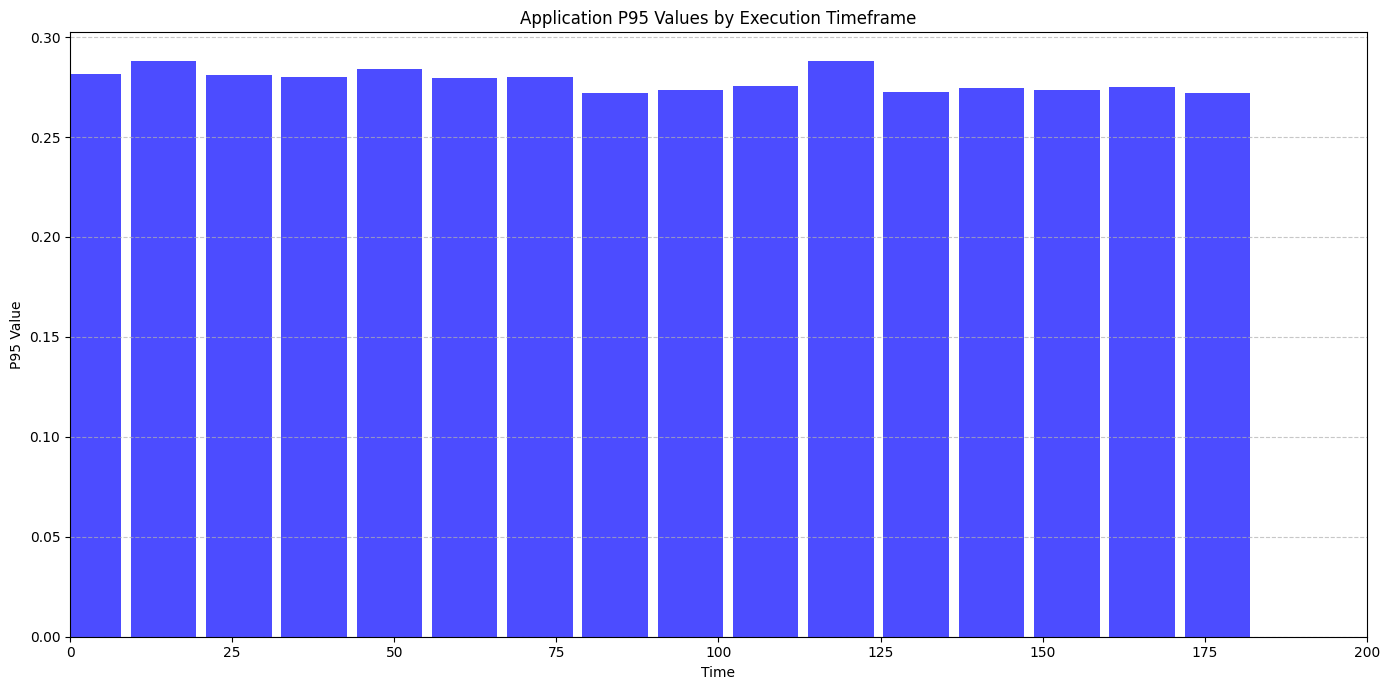

In [79]:
import pandas as pd
df = pd.read_csv("../part_3_results_group_073/mcperf_1.csv")
fig, ax = plt.subplots(figsize=(14, 7))
df = df[df["ts_end"] > begin]
df["ts_start"] -= begin
df["ts_end"] -= begin
df["ts_start"] /= 1000
df["ts_end"] /= 1000
df['p95'] /= 1000
for i, row in df.iterrows():
    width = row['ts_end'] - row['ts_start']
    print(width)
    ax.bar(row['ts_start'] + width/2,  # position the bar at the middle of its time range
           row['p95'],              # height of the bar is the p95 value
           width=width,             # width is the duration
           alpha=0.7,color="blue")
ax.set_xlabel('Time')
ax.set_ylabel('P95 Value')
ax.set_title('Application P95 Values by Execution Timeframe')

# Format x-axis with commas for thousands
ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis to start from 0
ax.set_ylim(bottom=0)
ax.set_xlim(0, 200)
plt.tight_layout()


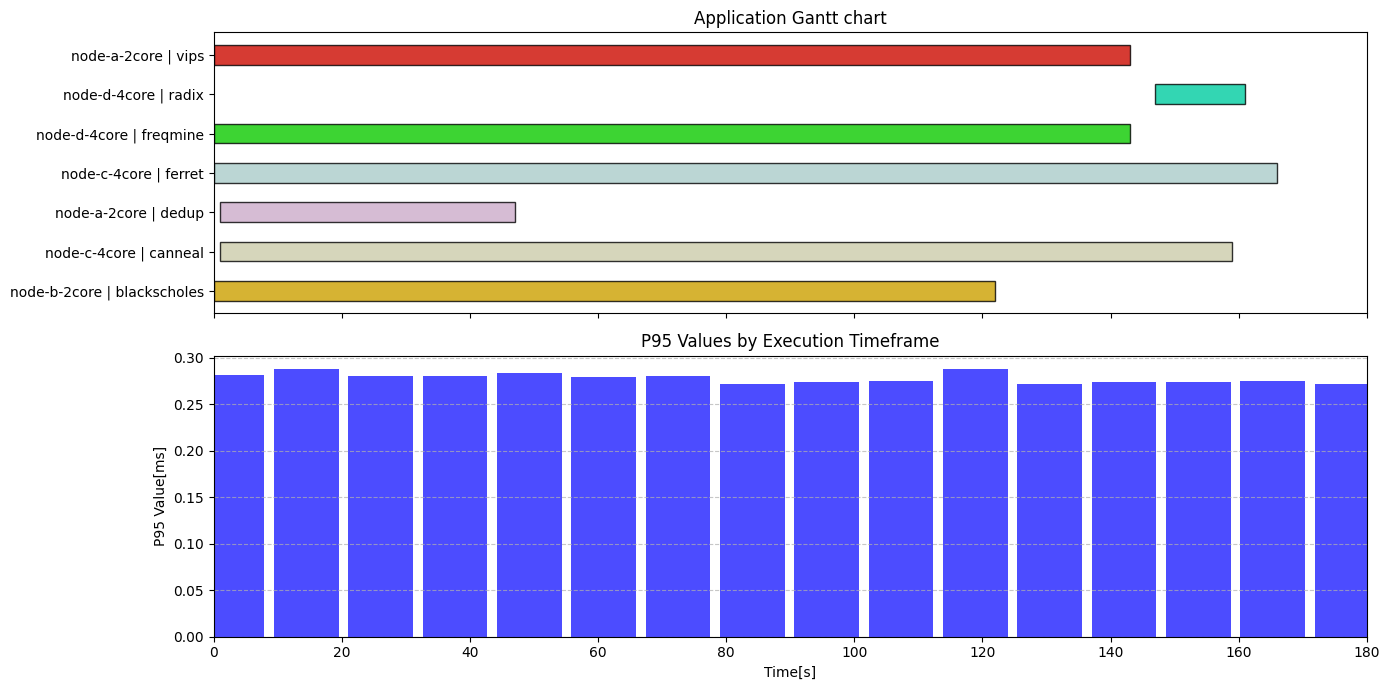

In [ ]:
import pandas as pd
app_colors = {
    'blackscholes': '#CCA000',
    'canneal': '#CCCCAA',
    'dedup': '#CCACCA',
    'ferret': '#AACCCA',
    'freqmine': '#0CCA00',
    'radix': '#00CCA0',
    'vips': '#CC0A00'
}
nodes = {
    'blackscholes': 'node-b-2core',
    'canneal': 'node-c-4core',
    'dedup': 'node-a-2core',
    'ferret': 'node-c-4core',
    'freqmine': 'node-d-4core',
    'radix': 'node-d-4core',
    'vips': 'node-a-2core'
}
df = pd.read_csv("../part_3_results_group_073/mcperf_1.csv")
df_parsec["node"] = df_parsec["application"].map(nodes)
fig, (ax1, ax2)  = plt.subplots(2, 1, figsize=(14, 7), sharex=True)
df = df[df["ts_end"] > begin]
df["ts_start"] -= begin
df["ts_end"] -= begin
df["ts_start"] /= 1000
df["ts_end"] /= 1000
df['p95'] /= 1000
for i, row in df.iterrows():
    width = row['ts_end'] - row['ts_start']
    ax2.bar(row['ts_start'] + width/2,  # position the bar at the middle of its time range
           row['p95'],              # height of the bar is the p95 value
           width=width,             # width is the duration
           alpha=0.7,color="blue")
ax2.set_xlabel('Time[s]')
ax2.set_ylabel('P95 Value[ms]')
ax2.set_title('P95 Values by Execution Timeframe')

# Format x-axis with commas for thousands
ax2.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add grid for better readability
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis to start from 0
ax2.set_ylim(bottom=0)
ax2.set_xlim(0, 180)


for i, (_, row) in enumerate(df_parsec.iterrows()):
    ax1.barh(i, row['duration'] / 1000, left=row['start'] / 1000, height=0.5, 
            color=app_colors[row["application"]], alpha=0.8, edgecolor='black')
ax1.set_yticks(y_positions)
ax1.set_yticklabels(df_parsec["node"] + " | " + df_parsec['application'])
ax1.set_title('Application Gantt chart')
plt.tight_layout()
